<a href="https://colab.research.google.com/github/sandrakaku/ml0930/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_boston #以一個小區為單位(千)(target)
pd.options.display.max_rows = 20
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 預處理: pandas/DataFrame
# 機器學習: numpy/np.array
import numpy as np
from sklearn.model_selection import train_test_split 
x, y = df.drop(["target"], axis=1), df["target"] #從DataFrame拿出來 
x, y = np.array(x), np.array(y) #array是答案
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.1
                            #,random_state=0
                            )







In [5]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5) #決策樹
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

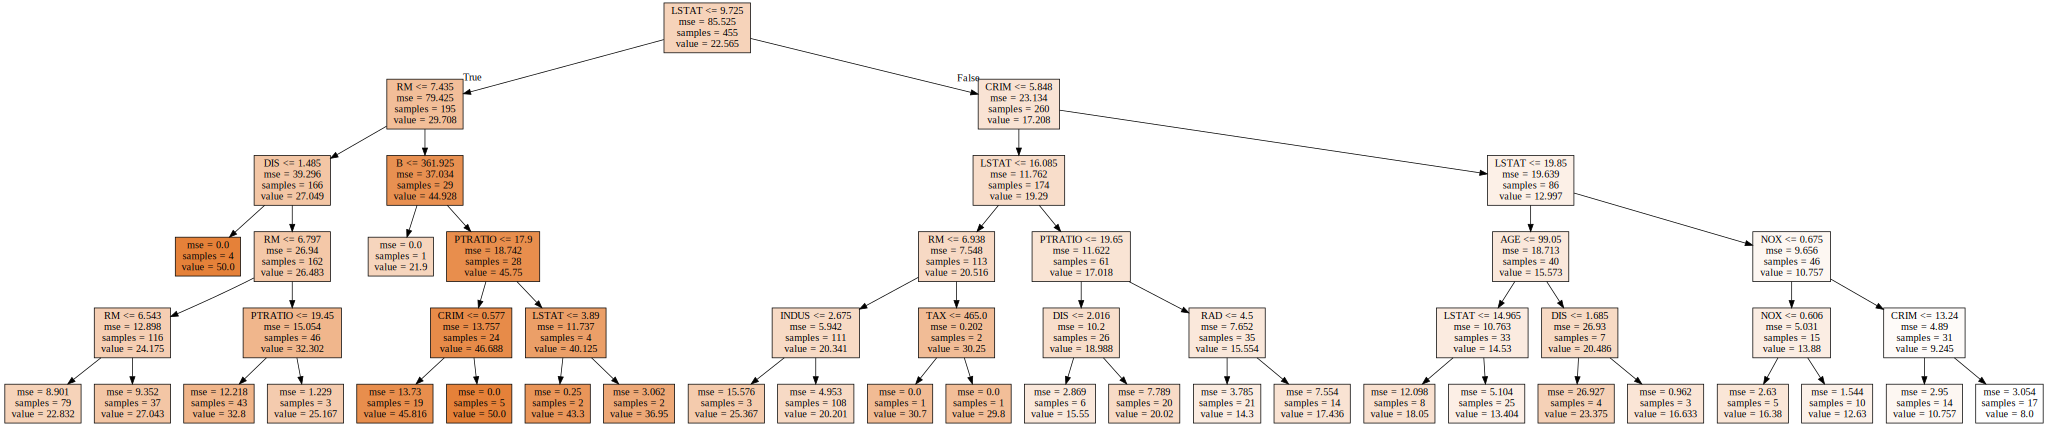

In [6]:
# 印出來
import graphviz
from sklearn.tree import export_graphviz #可以劃出方塊形狀的軟體
g = export_graphviz(reg,
           feature_names=boston["feature_names"],
           filled=True)
graphviz.Source(g) #決策樹學出來的樣子

In [8]:
#from sklearn.metrics import accuracy_score(對就對錯就錯)
pre = reg.predict(x_test)
pre

array([10.75714286, 50.        , 32.8       , 20.20092593, 27.04324324,
       22.83164557, 20.20092593, 32.8       , 20.20092593, 20.20092593,
       20.20092593, 22.83164557, 20.02      , 20.20092593, 20.20092593,
       13.404     , 22.83164557, 32.8       , 20.20092593, 22.83164557,
       20.20092593, 15.55      , 20.20092593, 27.04324324, 22.83164557,
       15.55      , 13.404     ,  8.        , 20.20092593, 20.20092593,
       22.83164557, 18.05      , 32.8       , 32.8       , 22.83164557,
       20.20092593, 20.20092593, 14.3       , 20.20092593, 30.7       ,
       14.3       , 20.20092593, 15.55      , 15.55      , 20.20092593,
       20.20092593, 15.55      , 22.83164557, 50.        , 20.20092593,
       15.55      ])